<a href="https://colab.research.google.com/github/Yuvann04/Task-1/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

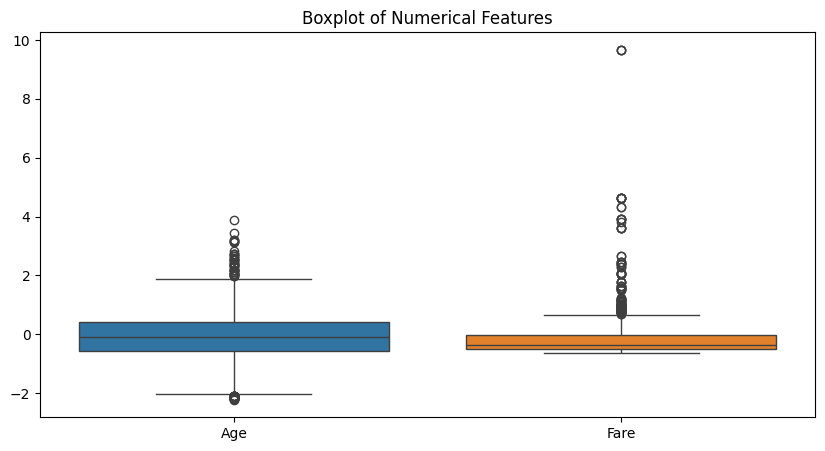

Data cleaned and saved to 'titanic_cleaned.csv'.


In [3]:
# Step 1: Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update the path if needed)
df = pd.read_csv('Titanic-Dataset.csv')

# Step 2: Explore Basic Info
print(df.info())
print(df.isnull().sum())

# Step 3: Handle Missing Values
# For numeric: Fill 'Age' with median, 'Fare' with mean
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Step 4: Convert Categorical Features (Encoding)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for 'Sex'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# One-hot encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Step 5: Normalize/Standardize Numerical Features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
cols_to_scale = ['Age', 'Fare']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# (Alternatively, use MinMaxScaler for normalization)
# scaler = MinMaxScaler()
# df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Step 6: Visualize Outliers with Boxplots
plt.figure(figsize=(10,5))
sns.boxplot(data=df[cols_to_scale])
plt.title('Boxplot of Numerical Features')
plt.show()

# Remove outliers using IQR method
for col in cols_to_scale:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Step 7: Save Cleaned Data
df.to_csv('titanic_cleaned.csv', index=False)

print("Data cleaned and saved to 'titanic_cleaned.csv'.")
